<a href="https://colab.research.google.com/github/neimali/GRM_used_car_price/blob/main/Grand_Montreal_used_car_price_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/used_car_data/eda_data.csv')

In [ ]:
df.head(10)

,Unnamed: 0,brand,model,model_year,list_price,color,configration,body_type,wheel_config,transmission,fuel_type,mileage,carfax_link,dealer_address,modelwithconfig,car_age,with_carfax
0,0,Scion,tC,2016,18499,Red,Sports Coupe 6naSpd M,Hatchback,FWD,Manual,Other,81000,na,"6464 Boul Henri-Bourassa E, Montréal-Nord, QC,...",tC ~ Sports Coupe 6naSpd M,6,0
1,1,Mercedes-Benz,Other,2019,36995,Black,A250 4MATIC * APPLE CAR PLAY | CHARGEUR SANS F...,Hatchback,AWD,Automatic,Other,18300,na,"4844 Boulevard Taschereau, Greenfield Park, QC...",Other ~ A250 4MATIC * APPLE CAR PLAY | CHARGEU...,3,0
2,2,BMW,X1,2018,31995,Black,XDrive28i véhicule d'activités sportives,SUV,4 x 4,Automatic,Gasoline,66139,https://www.carproof.com/order?ref=kijiji&vin=...,"6900 Louis-H Lafontaine, Anjou, QC, H1M 2T2",X1 ~ XDrive28i véhicule d'activités sportives,4,1
3,3,Volvo,XC60,2019,44994,Grey,T6 Momentum AWD,SUV,AWD,Automatic,Other,25605,na,"7050 rue Saint Jacques West, Montreal, QC, H4B...",XC60 ~ T6 Momentum AWD,3,0
4,4,GMC,Terrain,2018,23997,White,SLE Diesel,SUV,FWD,Automatic,Diesel,119250,na,"7050 rue Saint Jacques West, Montreal, QC, H4B...",Terrain ~ SLE Diesel,4,0
5,5,BMW,5-Series,2005,23500,Black,545i,Sedan,RWD,Manual,Gasoline,135000,na,"Pointe-Claire, QC H9R5E2",5-Series ~ 545i,17,0
6,6,Toyota,Other,2020,26000,Grey,na,Hatchback,FWD,Automatic,Hybrid-Electric,54912,https://www.carproof.com/order?ref=kijiji&vin=...,"1540 Clair cres., Lachine, QC, H8S 4E6",Other ~ na,2,1
7,7,Audi,Q5,2019,43995,Other,PROGRESSIV CAR PLAY,SUV,AWD,Automatic,Gasoline,68779,na,"2435 boulevard Chomedey, Laval, QC, H7T 2W3",Q5 ~ PROGRESSIV CAR PLAY,3,0
8,8,Subaru,Forester,2012,6995,Grey,500,Hatchback,FWD,Automatic,Gasoline,117000,https://www.carproof.com/order?ref=kijiji&vin=...,"352 Boulevard du Cure-labelle, Laval, QC, H7V 2X4",Forester ~ 500,10,1
9,9,Mazda,CX-5,2012,4995,Other,Sport,SUV,4 x 4,Automatic,Gasoline,230000,https://www.carproof.com/order?ref=kijiji&vin=...,"352 Boulevard du Cure-labelle, Laval, QC, H7V 2X4",CX-5 ~ Sport,10,1


In [ ]:
#choose relevant columns
df_model=df[['list_price','mileage','car_age','brand','model','color','modelwithconfig','body_type','wheel_config','transmission','fuel_type','with_carfax']]
#get dummy data
df_dum=pd.get_dummies(df_model)
#train test split
x=df_dum.drop('list_price',axis=1)
y=df_dum.list_price.values

Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y, test_size=0.8, random_state=42)
#multiple linear regression
LR=LinearRegression()
LR.fit(Xtrain,Ytrain)
np.mean(cross_val_score(LR,Xtrain,Ytrain,scoring='neg_mean_absolute_error',cv=3))
#lasso regression
#random forest
#tune model with gridsearchCV
#test ensembles

-11832.83477174559

In [ ]:
las=Lasso(max_iter=10000)
las.fit(Xtrain,Ytrain)
np.mean(cross_val_score(las,Xtrain,Ytrain,scoring='neg_mean_absolute_error',cv=3))

-9142.770747751576

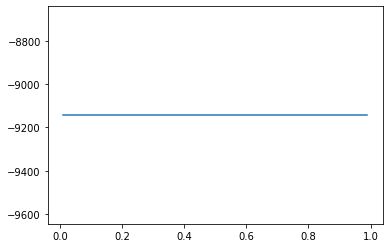

In [ ]:
alpha=[]
error=[]
for i in range(1,100):
  alpha.append(i/100)
  Las=Lasso(alpha=(i/100),max_iter=10000)
  error.append(np.mean(cross_val_score(las,Xtrain,Ytrain,scoring='neg_mean_absolute_error',cv=3)))
plt.plot(alpha,error)

In [ ]:
rf=RandomForestRegressor()
np.mean(cross_val_score(rf,Xtrain,Ytrain,scoring='neg_mean_absolute_error',cv=3))

-8841.245200602518

In [ ]:
pars={'n_estimators':range(10,300,10),'criterion':('squared_error', 'absolute_error', 'poisson'),'max_features':('sqrt', 'log2', None)}
gs=GridSearchCV(rf,pars,scoring='neg_mean_absolute_error',cv=3)
gs.fit(Xtrain,Ytrain)

gs.best_score_

-8714.844612715693

In [ ]:
#test
Ypred_LR=LR.predict(Xtest)
Ypred_Las=las.predict(Xtest)
Ypred_rf=gs.best_estimator_.predict(Xtest)

print('Error of linear Regression:')
print(mean_absolute_error(Ytest,Ypred_LR))
print('---------------------------')
print('Error of Lasso Regression:')
print(mean_absolute_error(Ytest,Ypred_Las))
print('---------------------------')
print('Error of Random Forest:')
print(mean_absolute_error(Ytest,Ypred_rf))

Error of linear Regression:
10423.384942805396
---------------------------
Error of Lasso Regression:
9115.568433564498
---------------------------
Error of Random Forest:
8548.350174692423


In [ ]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )